# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Importing data

In [ ]:
zhvi_all_homes = pd.read_csv('/content/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month (1).csv').set_index('RegionName').iloc[:, 4:]
zhvi_top_tier = pd.read_csv('/content/Metro_zhvi_uc_sfrcondo_tier_0.67_1.0_sm_sa_month.csv').set_index('RegionName').iloc[:, 4:]
zhvi_low_tier = pd.read_csv('/content/Metro_zhvi_uc_sfrcondo_tier_0.0_0.33_sm_sa_month.csv').set_index('RegionName').iloc[:, 4:]
new_listings = pd.read_csv('/content/Metro_new_listings_uc_sfrcondo_sm_month.csv').set_index('RegionName').iloc[:, 4:]
median_prices = pd.read_csv('/content/Metro_med_doz_pending_uc_sfrcondo_sm_month.csv').set_index('RegionName').iloc[:, 4:]
mean_prices = pd.read_csv('/content/Metro_mean_doz_pending_uc_sfrcondo_sm_month.csv').set_index('RegionName').iloc[:, 4:]

#Extracting last 5yr details from multiple datasets 
Extracted information
1. % change in low tier homes (average over last 5 yrs)
2. % change in top tier homes (average over last 5 yrs)
3. New monthly listings in regions (average over last 5 yrs)
4. Mean house price (average over last 5 yrs)
5. Median house price (average over last 5 yrs)


In [ ]:
avg_listing = new_listings.iloc[:, :].mean(axis = 1)
zhvi_top_tier_avg = zhvi_top_tier.iloc[:, 12*-5::12].pct_change(axis = 1).mean(axis = 1) * 100
zhvi_low_tier_avg = zhvi_low_tier.iloc[:, 12*-5::12].pct_change(axis = 1).mean(axis = 1) * 100

region_5yr_history = pd.DataFrame(zhvi_top_tier_avg, columns = ['avg zhvi change (top tier)'])
region_5yr_history.loc[:, 'avg zhvi change (low tier)'] = zhvi_low_tier_avg.reindex(region_5yr_history.index).values
region_5yr_history.loc[:, 'avg listings'] = avg_listing.reindex(region_5yr_history.index).values
region_5yr_history.loc[:, 'avg mean_prices'] = mean_prices.reindex(region_5yr_history.index).mean(axis = 1).values
region_5yr_history.loc[:, 'avg median_prices'] = median_prices.reindex(region_5yr_history.index).mean(axis = 1).values

# Plots

## General trends of ZVHI in US and 5 largest regions 

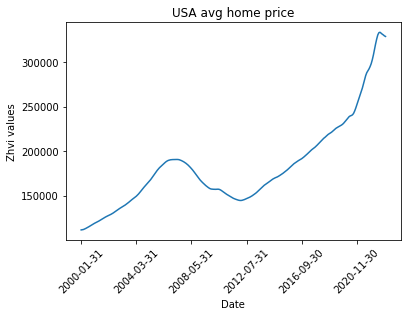

In [ ]:
zhvi_all_homes.iloc[0].T.plot()
plt.title('USA avg home price')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Zhvi values');

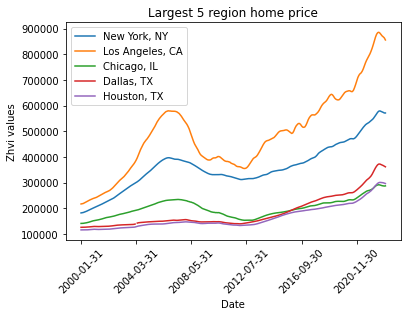

In [ ]:
zhvi_all_homes.iloc[1:6].T.plot()
plt.title('Largest 5 region home price')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Zhvi values')
plt.legend(loc = 'upper left');

## Comparing yearly change in ZHVI values between top tier and bottom tier homes

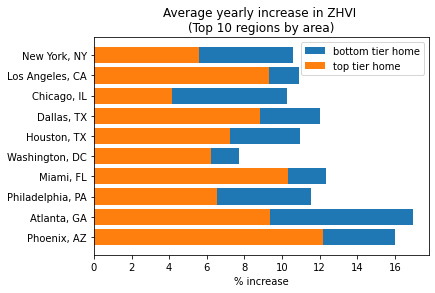

In [ ]:
plt.figure()
top_tier = zhvi_top_tier_avg.iloc[10:0:-1]
bottom_tier = zhvi_low_tier_avg.iloc[10:0:-1]

plt.barh(y = bottom_tier.index, width = bottom_tier.values, label = 'bottom tier home')
plt.barh(y = top_tier.index, width = top_tier.values, label = 'top tier home')

plt.title('Average yearly increase in ZHVI \n(Top 10 regions by area)')
plt.xlabel('% increase')

plt.legend();

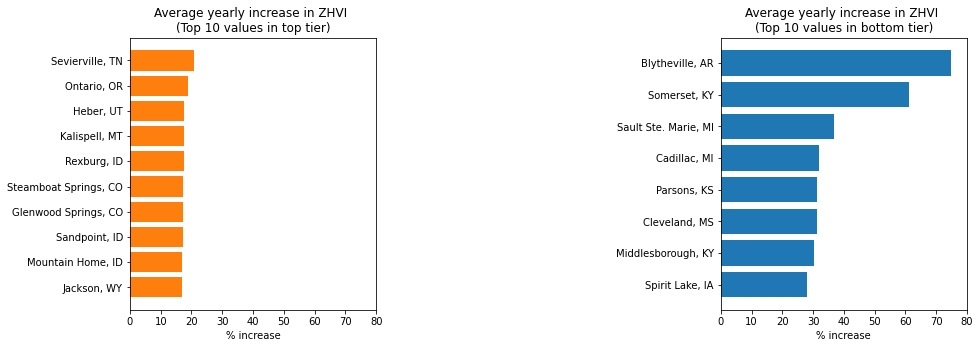

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(131)
temp = zhvi_top_tier_avg.sort_values().iloc[-10:]
plt.barh(y = temp.index, width = temp.values, color = 'tab:orange') 

plt.title('Average yearly increase in ZHVI \n(Top 10 values in top tier)')
plt.xlabel('% increase');
plt.xlim([0, 80])


plt.subplot(133)
temp = zhvi_low_tier_avg.sort_values().iloc[-10:]
plt.barh(y = temp.index, width = temp.values) 
plt.title('Average yearly increase in ZHVI \n(Top 10 values in bottom tier)')
plt.xlabel('% increase')
plt.xlim([0, 80]);


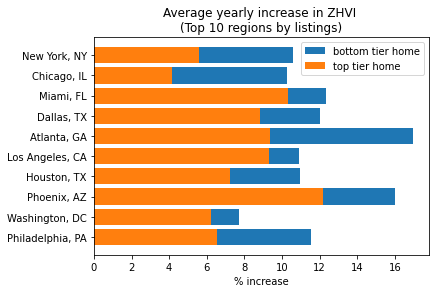

In [ ]:
plt.figure()
top_listings = region_5yr_history.loc[:, 'avg listings'].sort_values().dropna().index[-11:-1]
top_tier = zhvi_top_tier_avg.loc[top_listings]
bottom_tier = zhvi_low_tier_avg.loc[top_listings]

plt.barh(y = bottom_tier.index, width = bottom_tier.values, label = 'bottom tier home')
plt.barh(y = top_tier.index, width = top_tier.values, label = 'top tier home')

plt.title('Average yearly increase in ZHVI \n(Top 10 regions by listings)')
plt.xlabel('% increase')

plt.legend();

# Merged Data for further use

In [ ]:
# Transformed Data
region_5yr_history.head(10)

,avg zhvi change (top tier),avg zhvi change (low tier),avg listings,avg mean_prices,avg median_prices
RegionName,,,,,
United States,8.963320,11.840377,396883.457627,45.118644,19.220339
"New York, NY",5.584935,10.586140,17874.966102,74.593220,43.677966
"Los Angeles, CA",9.288361,10.885372,8677.711864,36.440678,17.728814
"Chicago, IL",4.141461,10.275292,12089.203390,47.033898,20.847458
"Dallas, TX",8.803350,12.023834,9259.067797,42.084746,23.406780
"Houston, TX",7.211094,10.934667,8019.406780,47.474576,20.322034
"Washington, DC",6.205178,7.732124,7693.491525,31.406780,14.000000
"Miami, FL",10.324804,12.327321,10617.796610,66.661017,31.288136
"Philadelphia, PA",6.545941,11.549052,7071.457627,41.084746,18.322034
